# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing Data Set

In [2]:
dataset = pd.read_csv('Churn_data.csv')


In [3]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Analysis cum Visualization

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
dataset.loc[dataset.Churn=='No','Churn'] = 0             #changing the categorical column of "Churn" 
dataset.loc[dataset.Churn=='Yes','Churn'] = 1            #into numerical for better analysis

In [7]:
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
dataset.duplicated().sum()

0

In [11]:
dataset.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
Churn             1.063031
dtype: float64

In [12]:
dataset.corr()

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


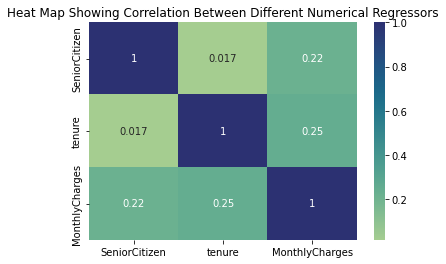

In [13]:
sns.heatmap(dataset.corr(),annot=True, cmap='crest')
plt.title('Heat Map Showing Correlation Between Different Numerical Regressors')
plt.show()

Making a plot of tenure

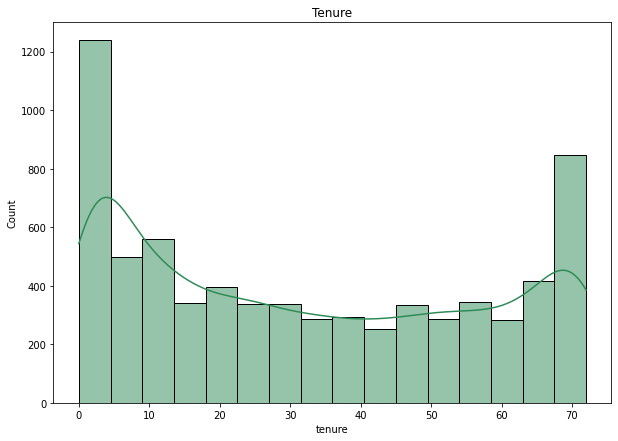

In [15]:
from matplotlib import rcParams
sns.histplot(dataset, x="tenure", kde = True, color= 'seagreen')
rcParams['figure.figsize'] = 10,7
plt.title('Tenure')
plt.show()

What Proportion Of Customers are Senior Citizen?


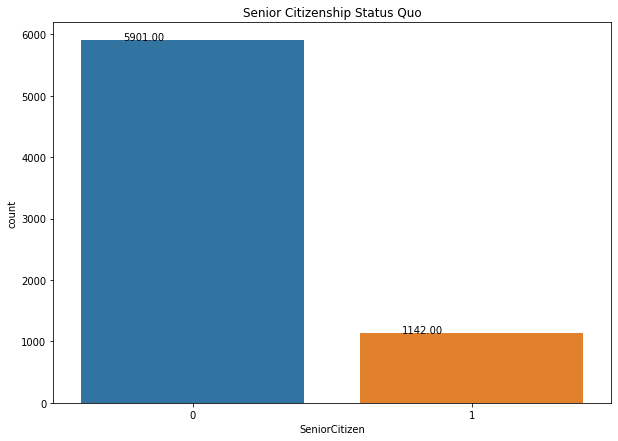

In [16]:
ax = sns.countplot(x="SeniorCitizen", data=dataset)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
sns.set(rc={'figure.figsize':(7,7)})
plt.title('Senior Citizenship Status Quo')
plt.show()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


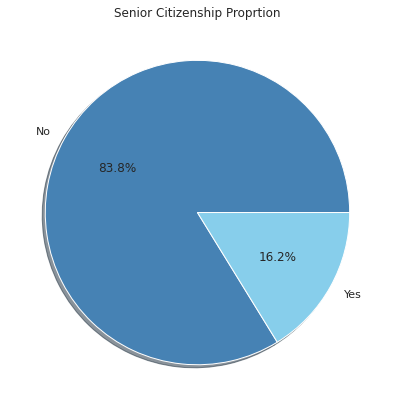

In [17]:
citizen_data= dataset.SeniorCitizen.value_counts()
print(citizen_data)

#Visualization
plt.pie(citizen_data,labels=['No','Yes'],colors=['steelblue','skyblue'],shadow=True,autopct="%.1f%%")
plt.title('Senior Citizenship Proprtion')
plt.show()

Monthly Charges Distribution

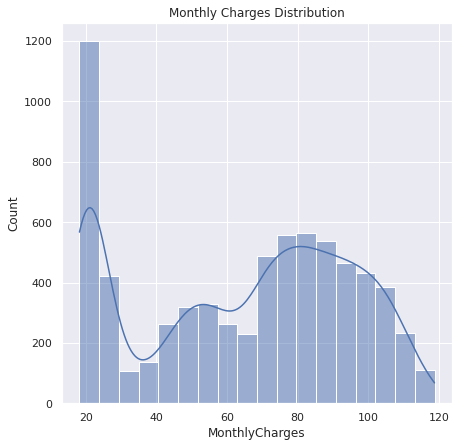

In [19]:
sns.histplot(dataset, x="MonthlyCharges", kde = True)
plt.title('Monthly Charges Distribution')
plt.show()

Visualizing The Gender Diversity Among Customers


In [20]:
gender_data= dataset.gender.value_counts()
print(gender_data)

Male      3555
Female    3488
Name: gender, dtype: int64


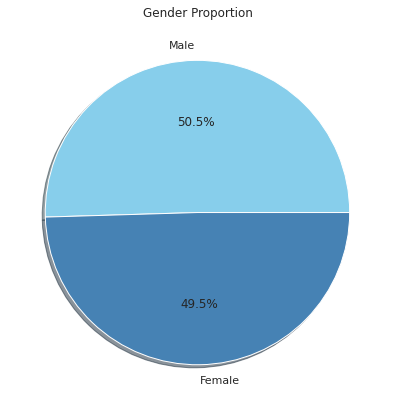

In [21]:
#Visualization
plt.pie(gender_data,labels=['Male','Female'],colors=['skyblue','steelblue'],shadow=True,autopct="%.1f%%")
plt.title('Gender Proportion')
plt.show()

Customers : With or Without Partners!

No     3641
Yes    3402
Name: Partner, dtype: int64


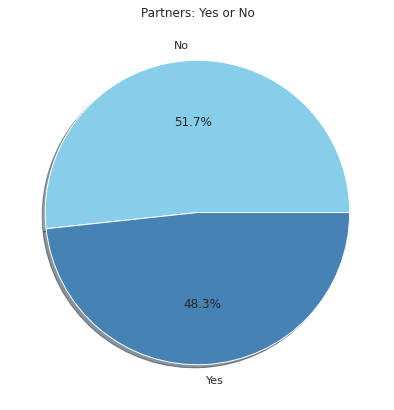

In [22]:
partnership= dataset.Partner.value_counts()
print(partnership)

#Visualization
plt.pie(partnership,labels=['No','Yes'],colors=['skyblue','steelblue'],shadow=True,autopct="%.1f%%")
plt.title('Partners: Yes or No')
plt.show()

Customers : With or Without Dependents!

No     4933
Yes    2110
Name: Dependents, dtype: int64


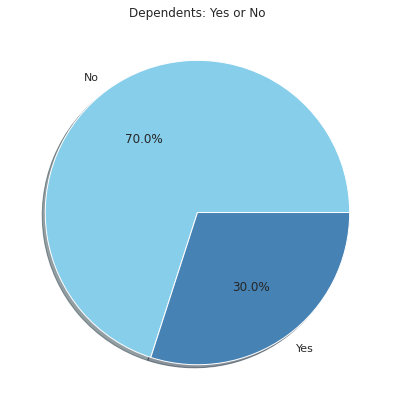

In [33]:
dp= dataset.Dependents.value_counts()
print(dp)

#Visualization
plt.pie(dp,labels=['No','Yes'],colors=['skyblue','steelblue'],shadow=True,autopct="%.1f%%")
plt.title('Dependents: Yes or No')
plt.show()

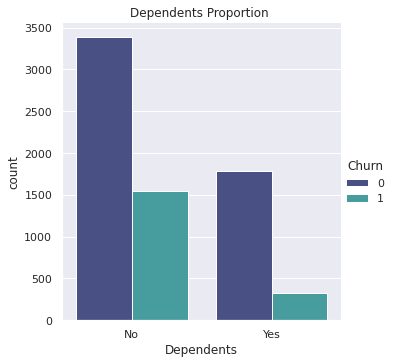

In [34]:
#Visualization
ax = sns.catplot(x='Dependents',hue = 'Churn',data=dataset,kind='count',palette='mako')
plt.title('Dependents Proportion ')
plt.show()

Churn rate based on Senior Citizenship

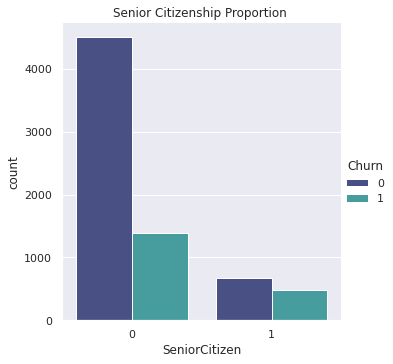

In [23]:
ax = sns.catplot(x='SeniorCitizen',hue = 'Churn',data=dataset,kind='count',palette='mako')
plt.title('Senior Citizenship Proportion ')
plt.show()

Churn rate based on PhoneService 


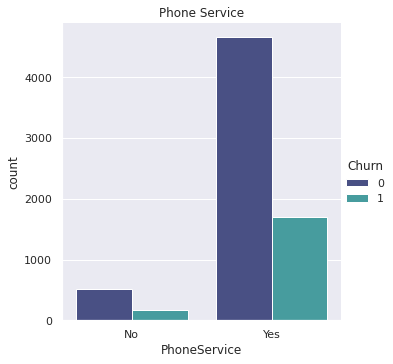

In [24]:
sns.catplot(x='PhoneService', hue = 'Churn',data=dataset,kind='count',palette='mako')
plt.title('Phone Service')
plt.show()

Churn rate based on InternetService Among Customers


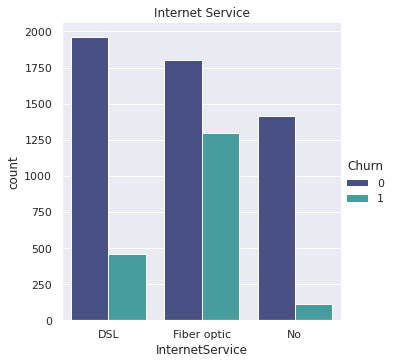

In [25]:
sns.catplot(x='InternetService', hue = 'Churn',data=dataset,kind='count',palette='mako')
plt.title('Internet Service')
plt.show()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


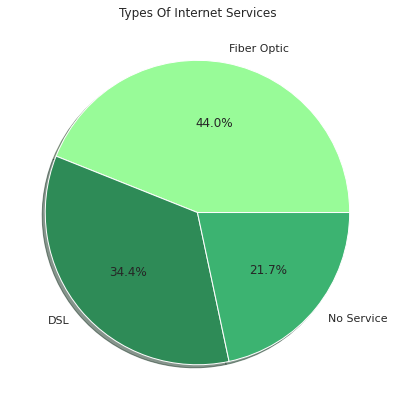

In [27]:
Service_Type_data= dataset.InternetService.value_counts()
print(Service_Type_data)

#Visualization
plt.pie(Service_Type_data,labels=['Fiber Optic','DSL','No Service'],colors=['palegreen','seagreen','mediumseagreen'],shadow=True,autopct="%.1f%%")
plt.title('Types Of Internet Services')
plt.show()

Churn rate based on Payment Method Adopted By Customers

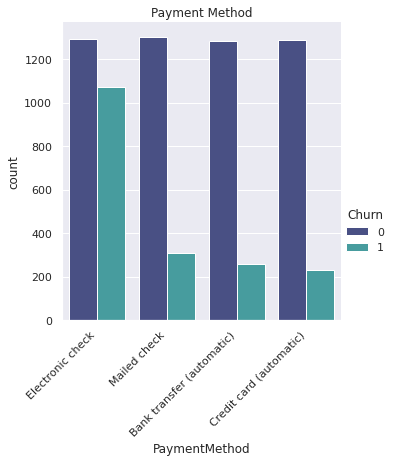

In [28]:
chart = sns.catplot(x='PaymentMethod', hue = 'Churn',data=dataset,kind='count',palette='mako')
plt.title('Payment Method')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',  
)
plt.show()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


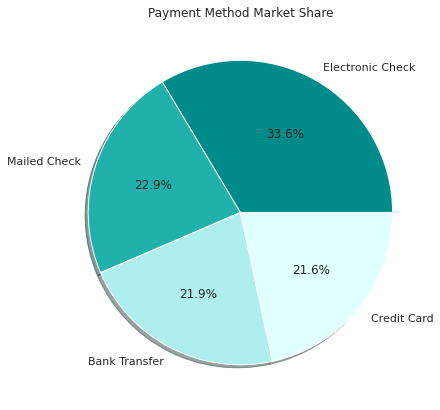

In [29]:
payment_data= dataset.PaymentMethod.value_counts()
print(payment_data)

#Visualization
plt.pie(payment_data,labels=['Electronic Check','Mailed Check','Bank Transfer','Credit Card'],colors=['darkcyan','lightseagreen','paleturquoise','lightcyan'],shadow=True,autopct="%.1f%%")
plt.title('Payment Method Market Share')
plt.show()


Analyzing The Various Contract Types Among Customers

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


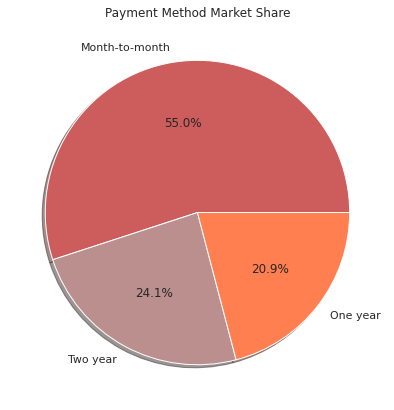

In [30]:
contract_data= dataset.Contract.value_counts()
print(contract_data)

#Visualization
plt.pie(contract_data,labels=['Month-to-month','Two year','One year'],colors=['indianred','rosybrown','coral'],shadow=True,autopct="%.1f%%")
plt.title('Payment Method Market Share')
plt.show()

# Analysing Numerical Data

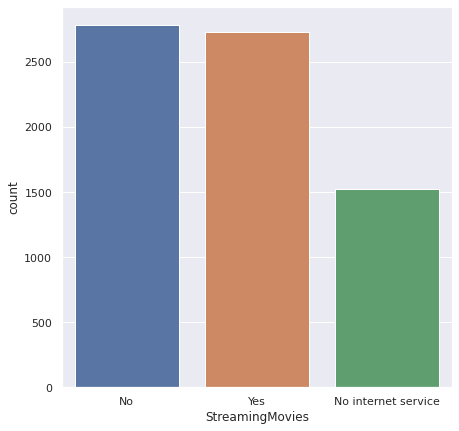

In [35]:
dataset['StreamingMovies'].value_counts()
sns.countplot(x="StreamingMovies", data=dataset)

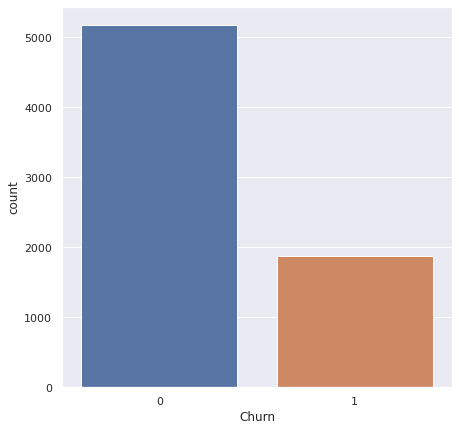

In [36]:
dataset['Churn'].value_counts()
sns.countplot(x="Churn", data=dataset)

0    5174
1    1869
Name: Churn, dtype: int64


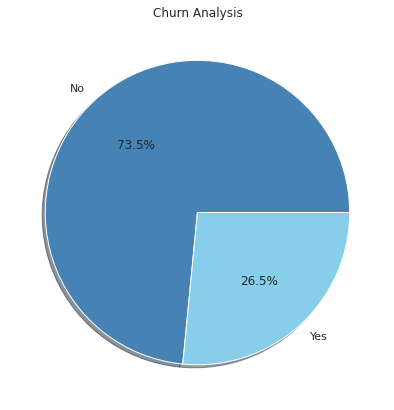

In [37]:
churn_data= dataset.Churn.value_counts()
print(churn_data)
plt.pie(churn_data,labels=['No','Yes'],colors=['steelblue','skyblue'],shadow=True,autopct="%.1f%%")
plt.title('Churn Analysis')
plt.show()

# Data Cleaning

In [39]:
dataset["TotalCharges"] = pd.to_numeric(dataset['TotalCharges'],errors = 'coerce')

In [40]:
dataset.drop(['customerID'],axis = 1,inplace = True)

In [41]:
dataset.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [42]:
df1=pd.get_dummies(data=dataset,columns=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],drop_first=True)


In [43]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [44]:
df1 = df1[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
        'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check','Churn']]

In [45]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")

df1.TotalCharges = imputer.fit_transform(df1["TotalCharges"].values.reshape(-1, 1))

In [46]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   uint8  
 5   Partner_Yes                            7043 non-null   uint8  
 6   Dependents_Yes                         7043 non-null   uint8  
 7   PhoneService_Yes                       7043 non-null   uint8  
 8   MultipleLines_No phone service         7043 non-null   uint8  
 9   MultipleLines_Yes                      7043 non-null   uint8  
 10  InternetService_Fiber optic            7043 non-null   uint8  
 11  Inte

# Deep Learning

In [48]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [49]:
df1.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [50]:
df1.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102395,-0.001874,0.016479,-0.211185,0.008576,-0.008576,0.142948,0.255338,-0.182742,-0.182742,-0.038653,-0.182742,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.824757,0.005106,0.379697,0.159712,0.008448,-0.008448,0.331941,0.019720,-0.039062,-0.039062,0.327203,-0.039062,0.360277,-0.039062,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.650468,-0.014569,0.096848,-0.113890,0.247398,-0.247398,0.490434,0.787066,-0.763557,-0.763557,0.296594,-0.763557,0.441780,-0.763557,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.102395,0.824757,0.650468,1.000000,0.000048,0.318812,0.064535,0.112851,-0.112851,0.468689,0.360547,-0.374263,-0.374263,0.412245,-0.374263,0.509692,-0.374263,0.522462,-0.374263,0.432480,-0.374263,0.515314,-0.374263,0.519574,0.170491,0.357224,0.157676,0.182581,-0.060412,-0.294125
gender_Male,-0.001874,0.005106,-0.014569,0.000048,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,0.006026,-0.013773,0.006026,-0.002105,0.006026,-0.009212,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,0.016479,0.379697,0.096848,0.318812,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,0.000615,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,-0.211185,0.159712,-0.113890,0.064535,0.010517,0.452676,1.000000,-0.001762,0.001762,-0.024526,-0.165818,0.139812,0.139812,0.080972,0.139812,0.023671,0.139812,0.013963,0.139812,0.063268,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,0.008576,0.008448,0.247398,0.112851,-0.006488,0.017706,-0.001762,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,-0.092893,0.172209,-0.052312,0.172209,-0.071227,0.172209,-0.096340,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.112851,0.006488,-0.017706,0.001762,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,0.092893,-0.172209,0.052312,-0.172209,0.071227,-0.172209,0.096340,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319
MultipleLines_Yes,0.142948,0.331941,0.490434,0.468689,-0.008414,0.142057,-0.024526,0.279690,-0.279690,1.000000,0.366083,-0.210564,-0.210564,0.098108,-0.210564,0.202237,-0.210564,0.201137,-0.210564,0.100571,-0.210564,0.257152,-0.210564,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206


In [51]:
X = df1.iloc[:,:-1].values
Y = df1.iloc[:,-1].values

In [52]:
print(X)


[[  0.     1.    29.85 ...   0.     1.     0.  ]
 [  0.    34.    56.95 ...   0.     0.     1.  ]
 [  0.     2.    53.85 ...   0.     0.     1.  ]
 ...
 [  0.    11.    29.6  ...   0.     1.     0.  ]
 [  1.     4.    74.4  ...   0.     0.     1.  ]
 [  0.    66.   105.65 ...   0.     0.     0.  ]]


In [53]:
print(Y)

[0 0 1 ... 0 1 0]


# Splitting the dataset into training and testset

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [55]:
print(y_test)

[0 0 0 ... 0 0 0]


In [56]:
print(X_train)

[[ 0.   24.   49.3  ...  1.    0.    0.  ]
 [ 1.   54.   65.25 ...  0.    0.    0.  ]
 [ 0.    3.   40.15 ...  0.    0.    1.  ]
 ...
 [ 0.   58.   20.75 ...  0.    0.    1.  ]
 [ 1.    1.   69.75 ...  0.    1.    0.  ]
 [ 0.    4.   20.4  ...  1.    0.    0.  ]]


In [57]:
print(y_train)

[0 0 1 ... 0 1 0]


# Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building an ANN


## Initializing the ANN

In [59]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=29, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training an ANN

In [60]:
X_train=np.asarray(X_train).astype(np.int)

y_train=np.asarray(y_train).astype(np.int)

In [61]:
y_train=np.asarray(y_train).astype(np.int)

y_test=np.asarray(y_test).astype(np.int)

In [62]:
print(X_train)

[[ 0  0  0 ...  1  0  0]
 [ 2  0  0 ...  0  0  0]
 [ 0 -1  0 ...  0  0  1]
 ...
 [ 0  1 -1 ...  0  0  1]
 [ 2 -1  0 ...  0  1  0]
 [ 0 -1 -1 ...  1  0  0]]


In [63]:
print(y_train)

[0 0 1 ... 0 1 0]


In [64]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
166/166 [==============================] - 1s 2ms/step - loss: 0.5130 - accuracy: 0.7391
Epoch 2/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4341 - accuracy: 0.7952
Epoch 3/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.8027
Epoch 4/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8082
Epoch 5/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8061
Epoch 6/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4117 - accuracy: 0.8094
Epoch 7/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4104 - accuracy: 0.8103
Epoch 8/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4085 - accuracy: 0.8097
Epoch 9/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8105
Epoch 10/100
166/166 [==============================] - 0s 2ms/step - loss: 0.4065 - accura

## Making Predictions on Testset

In [65]:
y_pred = ann.predict(X_test)


In [66]:
print(y_pred)

[[0.0545212 ]
 [0.49503025]
 [0.2632799 ]
 ...
 [0.00769252]
 [0.00080496]
 [0.00219324]]


In [67]:
for i in range (0,y_pred.shape[0]):
  if y_pred[i] >0.5:
    y_pred[i] = 1
  else:
    y_pred[i]=0

In [68]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [69]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),  y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


## Making Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1122  176]
 [ 225  238]]


0.7722884724588303

## Applying K-fold cross Validation

In [71]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [101]:
def build_model():
    ann = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=29, activation='relu'),
        tf.keras.layers.Dense(units=6, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')])
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann

ann = build_model()

history = ann.fit(X_train, y_train, epochs=1)

keras_clf = KerasClassifier(build_model)

accuracies = cross_val_score(estimator=keras_clf, scoring="accuracy", 
    X=X_train, y=y_train, cv=5)

print(accuracies)

166/166 [==============================] - 1s 2ms/step - loss: 0.4986 - accuracy: 0.7524


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  del sys.path[0]


133/133 [==============================] - 1s 2ms/step - loss: 0.5068 - accuracy: 0.7378
[0.79848628 0.78618732 0.76609848 0.79640152 0.79829545]


In [102]:
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))

Accuracy: 78.91 %
